In [1]:
import geopandas as gpd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tomllib
import contextily as cx

with open("plotting_config.toml", "rb") as fp:
    config = tomllib.load(fp)

In [36]:
daily_1 = pd.read_csv("../data/yjmob100k/daily_activity_1.csv")
daily_2 = pd.read_csv("../data/yjmob100k/daily_activity_2.csv")

In [ ]:
dd1 = daily_1.groupby("d")["uid"].sum().reset_index()
dd2 = daily_2.groupby("d")["uid"].sum().reset_index()

In [ ]:
daily1["dt"] = daily1["d"] + daily1["t"].apply(lambda x: x/10 if x<10 else x/100)

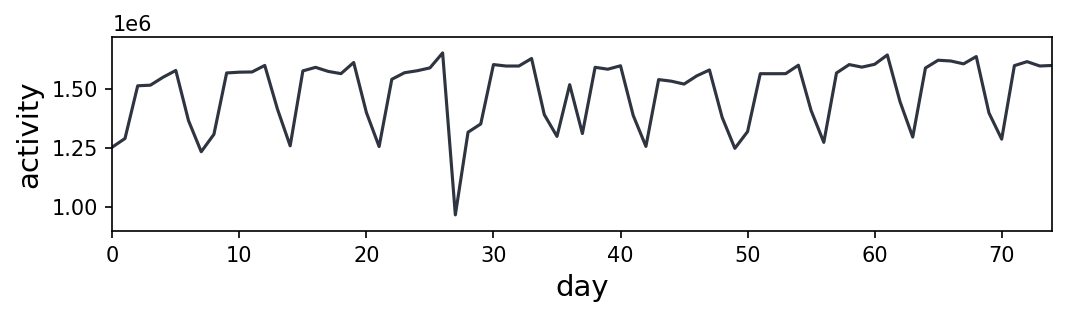

In [41]:
fig, ax = plt.subplots(figsize=(7, 2), layout="constrained", dpi=150, facecolor="none")
# sns.lineplot(ax=ax, data=daily1.query("d<=21"), x="dt", y="uid")
sns.lineplot(ax=ax, data=dd1, x="d", y="uid", color="#2e3440")
ax.set_xlabel("day", fontsize=14)
ax.set_ylabel("activity", fontsize=14)
ax.margins(0, 0.1)
ax.set_facecolor("none")
for i in config["formats"]:
    fig.savefig(
        f"../figures/daily_activity.{i}",
        pad_inches=0,
        metadata=config["metadata"][i],
    )


In [175]:
weekends = [0, 6, 7, 13, 14, 20, 21, 27, 28, 34, 35, 41, 42, 48, 49, 55, 56, 62, 63, 69, 70]
# 2019-09-15
# 2019-09-21
# 2019-09-22
# 2019-09-28
# 2019-09-29
# 2019-10-05
# 2019-10-06
# 2019-10-12
# 2019-10-13
# 2019-10-19
# 2019-10-20
# 2019-10-26
# 2019-10-27
# 2019-11-02
# 2019-11-03
# 2019-11-09
# 2019-11-10
# 2019-11-16
# 2019-11-17
# 2019-11-23
# 2019-11-24
holidays = [1, 8, 29, 37, 50]
# 2019-09-16
# 2019-09-23
# 2019-10-14
# 2019-10-22
# 2019-11-04
typhoon = [27]
# 2019-10-12

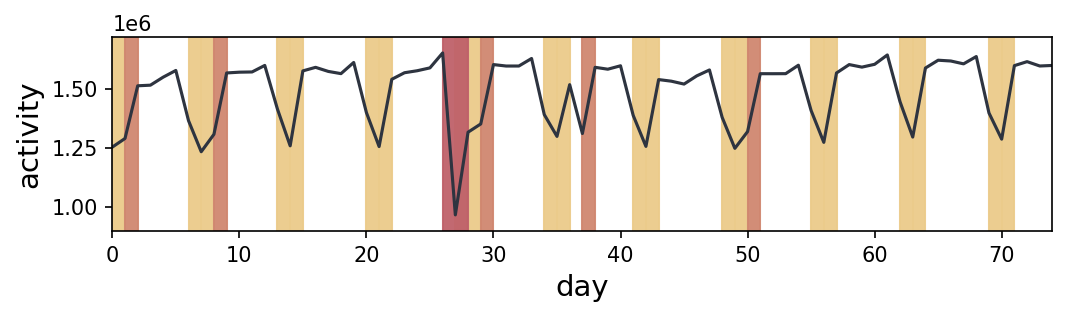

In [184]:
fig, ax = plt.subplots(figsize=(7, 2), layout="constrained", dpi=150, facecolor="none")
sns.lineplot(ax=ax, data=dd1, x="d", y="uid", color="#2e3440")
ax.set_xlabel("day", fontsize=14)
ax.set_ylabel("activity", fontsize=14)
ax.margins(0, 0.1)
ax.set_facecolor("none")
for i in weekends:
    ax.axvspan(i, i+1, color='#ebcb8b', alpha=0.95)
for i in config["formats"]:
    fig.savefig(
        f"../figures/daily_activity_annotated_weekend.{i}",
        pad_inches=0,
        metadata=config["metadata"][i],
    )
for i in holidays:
    ax.axvspan(i, i+1, color='#d08770', alpha=0.95)
for i in config["formats"]:
    fig.savefig(
        f"../figures/daily_activity_annotated_weekend_holiday.{i}",
        pad_inches=0,
        metadata=config["metadata"][i],
    )
for i in typhoon:
    ax.axvspan(i-1, i+1, color='#bf616a', alpha=0.95)
for i in config["formats"]:
    fig.savefig(
        f"../figures/daily_activity_annotated.{i}",
        pad_inches=0,
        metadata=config["metadata"][i],
    )

In [ ]:
# fig, ax = plt.subplots(figsize=(7, 2), layout="constrained", dpi=150, facecolor="none")
# sns.lineplot(ax=ax, data=dd2, x="d", y="uid", color="#2e3440")
# ax.set_xlabel("day", fontsize=14)
# ax.set_ylabel("activity", fontsize=14)
# ax.margins(0, 0.1)

In [2]:
grid = gpd.read_file("../data/yjmob100k/grid_bl_2449.geojson")

In [3]:
gg = grid.query("y.between(60, 90) & x.between(90, 120)").copy()

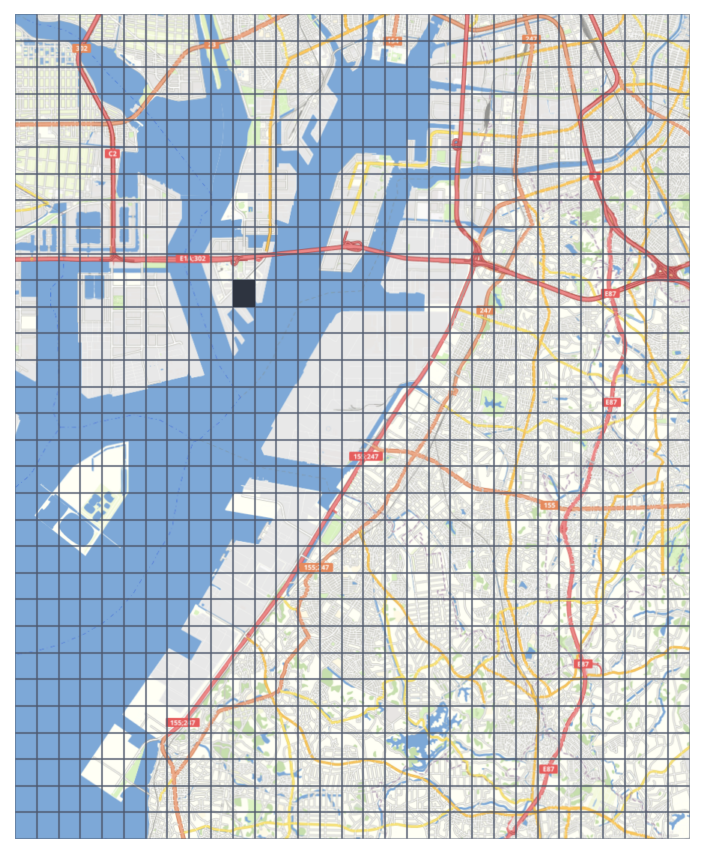

In [4]:
# fig, ax = plt.subplots(figsize=(4.5, 5.5), layout="constrained", dpi=150)
fig = plt.figure(figsize=(4.5, 5.5), dpi=150)
ax = fig.add_axes([0, 0, 1, 1], frameon=False, xticks=[], yticks=[])
# gg.plot(ax=ax, ec="#bf616aa0", fc="none")
gg.plot(ax=ax, ec="#4c566a70", fc="none")
gg.query("x==110 & y==70").plot(ax=ax, ec="none", fc="#2e3440")
ax.margins(0)
cx.add_basemap(
    ax,
    crs=2449,
    source=cx.providers.OpenStreetMap.CAT,
    # source=cx.providers.CartoDB.VoyagerNoLabels,
    alpha=1,
    attribution=False,
)
_ = ax.axis("off")
for i in ["png"]:
    fig.savefig(
        f"../figures/port_messe_nagoya.{i}",
        pad_inches=0,
        metadata=config["metadata"][i],
    )

In [87]:
pmn = pd.read_csv("../data/yjmob100k/port_messe_nagoya_activity.csv")

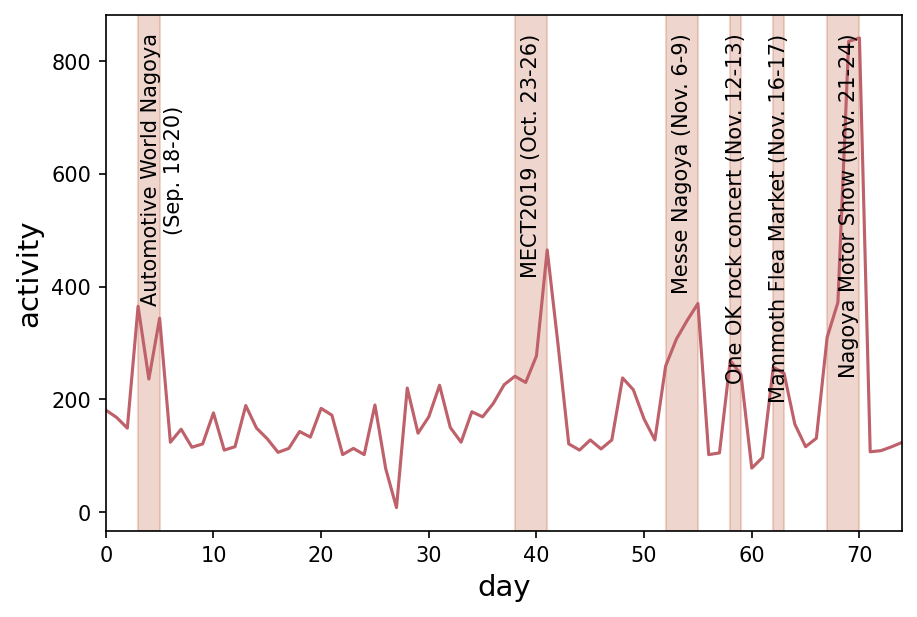

In [145]:
fig, ax = plt.subplots(figsize=(6, 4), layout="constrained", dpi=150, facecolor="none")
ax.margins(0, 0.05)
ax.set_xlabel("day", fontsize=14)
ax.set_ylabel("activity", fontsize=14)
sns.lineplot(ax=ax, data=pmn, x="d", y="count", color="#bf616a")
ax.set_facecolor("none")
for i in ["svg"]:
    fig.savefig(
        f"../figures/port_messe_nagoya_activity.{i}",
        pad_inches=0,
        metadata=config["metadata"][i],
    )

ax.axvspan(3, 5, color='#d08770', alpha=0.35)
ax.axvspan(38, 41, color='#d08770', alpha=0.35)
ax.axvspan(52, 55, color='#d08770', alpha=0.35)
ax.axvspan(58, 59, color='#d08770', alpha=0.35)
ax.axvspan(62, 63, color='#d08770', alpha=0.35)
ax.axvspan(67, 70, color='#d08770', alpha=0.35)


# ax.text(4, 450, "Automotive World Nagoya\nSep. 18-20")
# ax.text(39, 450, "MECT2019\nOct. 23-26")
# ax.text(53, 450, "Messe Nagoya\nNov. 6-9")

ax.text(5.25, 850, "Automotive World Nagoya\n(Sep. 18-20)", rotation=90, va="top", ha="center")
ax.text(39.5, 850, "MECT2019 (Oct. 23-26)", rotation=90, va="top", ha="center")
ax.text(53.5, 850, "Messe Nagoya (Nov. 6-9)", rotation=90, va="top", ha="center")
ax.text(58.5, 850, "One OK rock concert (Nov. 12-13)", rotation=90, va="top", ha="center")
ax.text(62.5, 850, "Mammoth Flea Market (Nov. 16-17)", rotation=90, va="top", ha="center")
ax.text(69, 850, "Nagoya Motor Show (Nov. 21-24)", rotation=90, va="top", ha="center")

for i in ["svg"]:
    fig.savefig(
        f"../figures/port_messe_nagoya_activity_label.{i}",
        pad_inches=0,
        metadata=config["metadata"][i],
    )